In [1]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Baseball Case Study

 - __Problem Statement__:  This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


 - __Input features__:   Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors


 - __Output__:   Number of predicted wins (W)

In [2]:
#Read csv file and convert into dataframe
df = pd.read_csv(r"baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
#Renaming of columns for better understanding
df.rename(columns={'W':'Wins','R':'Runs','AB':'At_bats','H':'Hits','2B':'Doubles','3B':'Triples',
                  'HR':'Homeruns','BB':'Walks','SO':'Strikeouts','SB':'Stolen_Bases','RA':'Runs_Allowed',
                  'ER':'Earned_Runs','ERA':'Earned_Run_Avg','CG':'Complete_Games','SHO':'Shutouts','SV':'Saves',
                  'E':'Errors'}, 
                        inplace=True)

In [4]:
#lets check for null values
df.isnull().sum()

Wins              0
Runs              0
At_bats           0
Hits              0
Doubles           0
Triples           0
Homeruns          0
Walks             0
Strikeouts        0
Stolen_Bases      0
Runs_Allowed      0
Earned_Runs       0
Earned_Run_Avg    0
Complete_Games    0
Shutouts          0
Saves             0
Errors            0
dtype: int64

Greate we dont have any null values

In [5]:
#lets look at info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Wins            30 non-null     int64  
 1   Runs            30 non-null     int64  
 2   At_bats         30 non-null     int64  
 3   Hits            30 non-null     int64  
 4   Doubles         30 non-null     int64  
 5   Triples         30 non-null     int64  
 6   Homeruns        30 non-null     int64  
 7   Walks           30 non-null     int64  
 8   Strikeouts      30 non-null     int64  
 9   Stolen_Bases    30 non-null     int64  
 10  Runs_Allowed    30 non-null     int64  
 11  Earned_Runs     30 non-null     int64  
 12  Earned_Run_Avg  30 non-null     float64
 13  Complete_Games  30 non-null     int64  
 14  Shutouts        30 non-null     int64  
 15  Saves           30 non-null     int64  
 16  Errors          30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage

In [6]:
# Lets have a look on data after updation
df

,Wins,Runs,At_bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Avg,Complete_Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


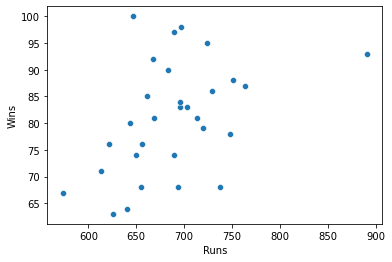

In [7]:
#Lets see impact of runs on number of wins
sns.scatterplot(x = 'Runs', y = 'Wins', data = df)
plt.show()

We can say by this plot, as runs getting higher the chances of winning becoms more.

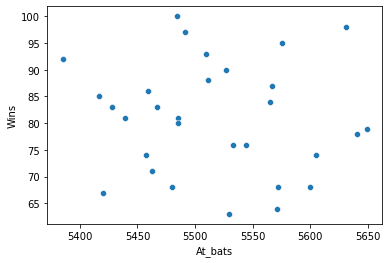

In [8]:
#check relation between wins and at_bats feature
sns.scatterplot(x = 'At_bats', y = 'Wins', data = df)
plt.show()

there is no any significant relationship between wins and At bat feature is observed.

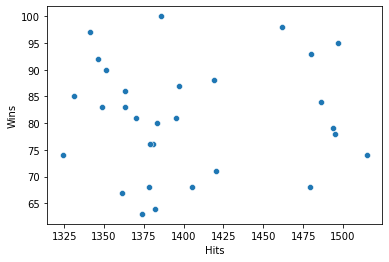

In [9]:
# wins v/s Hits
sns.scatterplot(x = 'Hits', y = 'Wins', data = df)
plt.show()

here also we can't say there is any linear relation with target variable

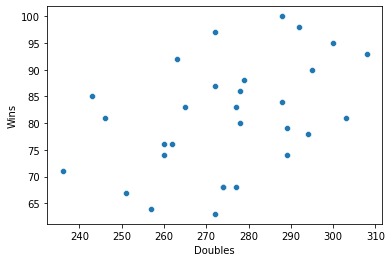

In [10]:
#number of wins based on number of doubles
sns.scatterplot(x = 'Doubles', y = 'Wins', data = df)
plt.show()

* If number of doubles are under 250,  the chances of win is below 85 times.
* And if the number of doubles more than 280 the chances of wins is more than 85 times.

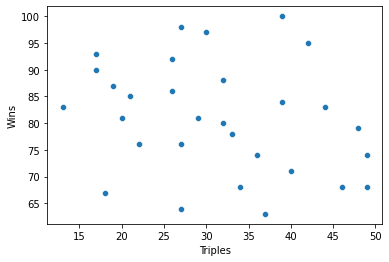

In [11]:
#Lets check impact of number of tripples on number of Wins
sns.scatterplot(x = 'Triples', y = 'Wins', data = df)
plt.show()

We can say number of tripples are not much correlated with wins.

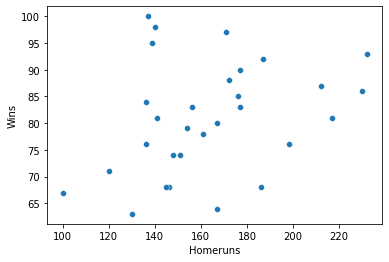

In [12]:
#Lets check impact of number of homeruns on number of Wins
sns.scatterplot(x = 'Homeruns', y = 'Wins', data = df)
plt.show()

* By looking at this plot we can say if the number of homeruns is below 140, the chances of wins becoms less

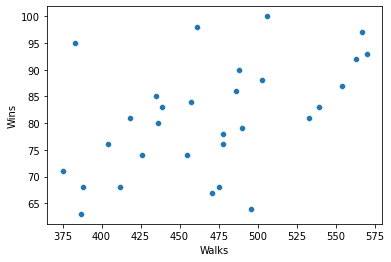

In [13]:
#Lets check impact of number of Walks on number of Wins
sns.scatterplot(x = 'Walks', y = 'Wins', data = df)
plt.show()

* if walk is above 525 number of wins are more than 80.But still there is not much correlation is observed.

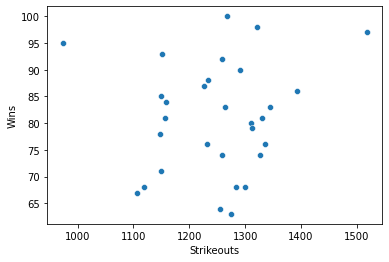

In [14]:
#Lets check impact of number of Strikeouts on number of Wins
sns.scatterplot(x = 'Strikeouts', y = 'Wins', data = df)
plt.show()

this feature is not showing any linear relation with number of wins.

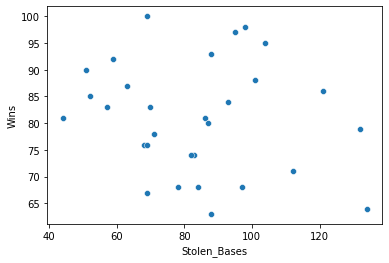

In [15]:
#Lets check impact of number of Stolen_Bases on number of Wins
sns.scatterplot(x = 'Stolen_Bases', y = 'Wins', data = df)
plt.show()

* A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled.
* Here if stolen base is between 40 to 60 the number of wins are above 80

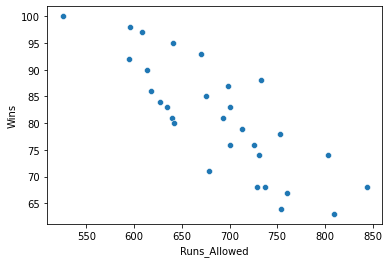

In [16]:
#Lets check impact of number of Runs_Allowed on number of Wins
sns.scatterplot(x = 'Runs_Allowed', y = 'Wins', data = df)
plt.show()

* By observing above plot we can say Runs_Allowed are negatively related to number of wins, that is as Runs_allowed increases the win possibility goes down.

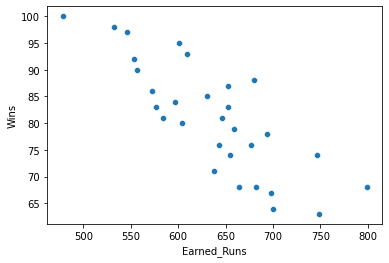

In [17]:
#Lets check impact of number of Earned_Runs on number of Wins
sns.scatterplot(x = 'Earned_Runs', y = 'Wins', data = df)
plt.show()

* same as Runs_Allowed, Earned_Runs also negatively related to number of wins

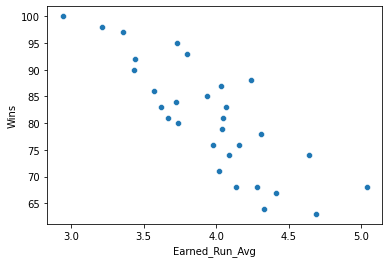

In [18]:
#Lets check impact of number of Earned_Run_Avg on number of Wins
sns.scatterplot(x = 'Earned_Run_Avg', y = 'Wins', data = df)
plt.show()

Earned_Run_Avg is negatively related to number of wins and is completely depends on feature Earned_Runs.

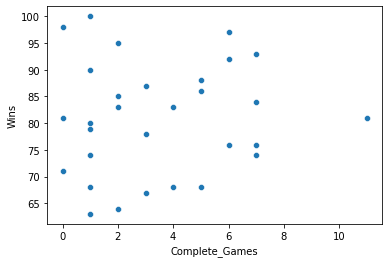

In [19]:
#Lets check impact of number of Complete_Games on number of Wins
sns.scatterplot(x = 'Complete_Games', y = 'Wins', data = df)
plt.show()

* we can say that as number of complete games goes above 6 then the number of wins is more than 72.

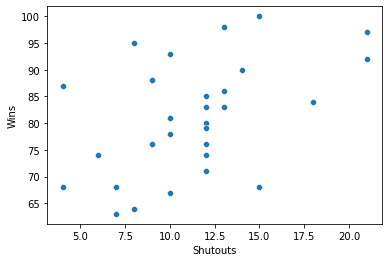

In [20]:
#Lets check impact of number of Shutouts on number of Wins
sns.scatterplot(x = 'Shutouts', y = 'Wins', data = df)
plt.show()

 A shutout refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run.

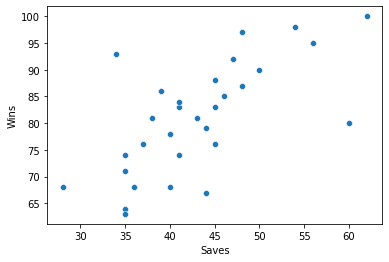

In [21]:
#Lets check impact of number of Saves on number of Wins
sns.scatterplot(x = 'Saves', y = 'Wins', data = df)
plt.show()

A save is awarded to the relief pitcher who finishes a game for the winning team, under certain circumstances.

here as the number of save goes higher the number of wins also increases

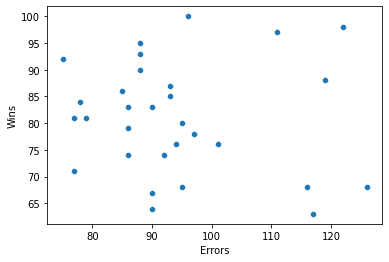

In [22]:
#Lets check impact of number of Errors on number of Wins
sns.scatterplot(x = 'Errors', y = 'Wins', data = df)
plt.show()

In baseball statistics, an error is an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out.

here number of errors are more in the range of 70 to 100.

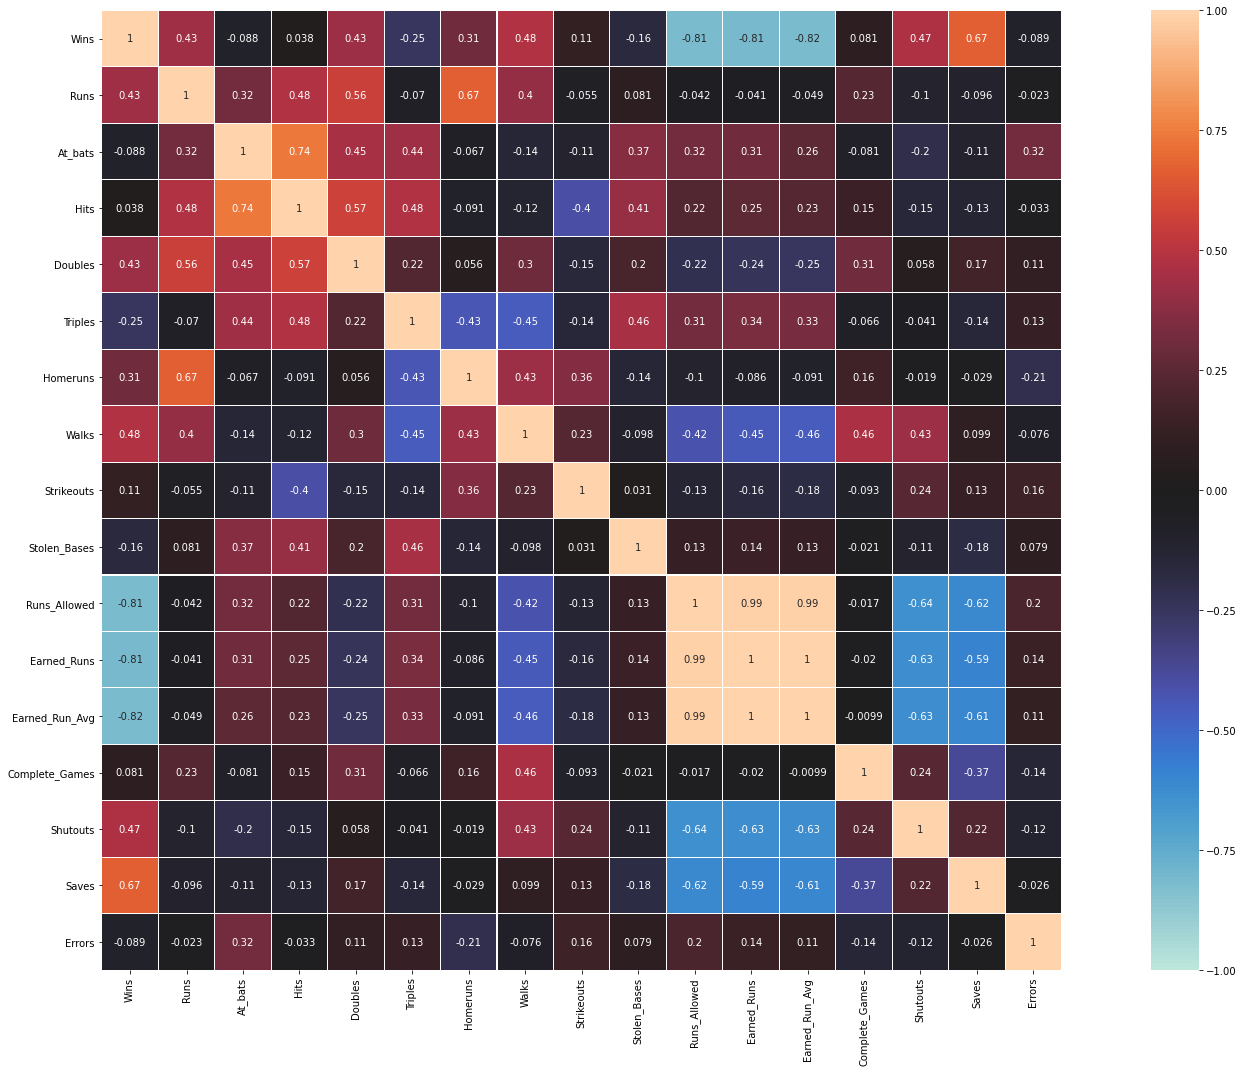

In [23]:
#Lets plot heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidths=0.1)
plt.tight_layout()

* By observing heatmap we can say that Runs_allowed, Earned_Runs and  Earned_Run_Avg are giving maximum relation with wins prediction, and it is also observed that these features are strongly related to each other.
* We can drop column earned_runs and Runs_Allowed as it is in 100% correlation with Earned_Run_Avg.
* Features like Errors, complete_games and At_bats are least related to number of wins so we will drop these features also.
* Runs_allowed, Earned_Runs and  Earned_Run_Avg these features are also in good correlation with shutouts and saves, which is arround negative 60%

In [24]:
#dropping unwanted columnas
colms = ["Earned_Runs", "Runs_Allowed", "Errors", "Complete_Games", "Hits","Strikeouts","Stolen_Bases"]
df.drop(columns = colms, axis = 1, inplace = True)

In [25]:
#Lets check descrption of our data
df.describe()

,Wins,Runs,At_bats,Doubles,Triples,Homeruns,Walks,Earned_Run_Avg,Shutouts,Saves
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,274.733333,31.300000,163.633333,469.100000,3.956333,11.300000,43.066667
std,10.453455,58.761754,70.467372,18.095405,10.452355,31.823309,57.053725,0.454089,4.120177,7.869335
min,63.000000,573.000000,5385.000000,236.000000,13.000000,100.000000,375.000000,2.940000,4.000000,28.000000
25%,74.000000,651.250000,5464.000000,262.250000,23.000000,140.250000,428.250000,3.682500,9.000000,37.250000
50%,81.000000,689.000000,5510.000000,275.500000,31.000000,158.500000,473.000000,4.025000,12.000000,42.000000
75%,87.750000,718.250000,5570.000000,288.750000,39.000000,177.000000,501.250000,4.220000,13.000000,46.750000
max,100.000000,891.000000,5649.000000,308.000000,49.000000,232.000000,570.000000,5.040000,21.000000,62.000000


* our data looks quite good here. 

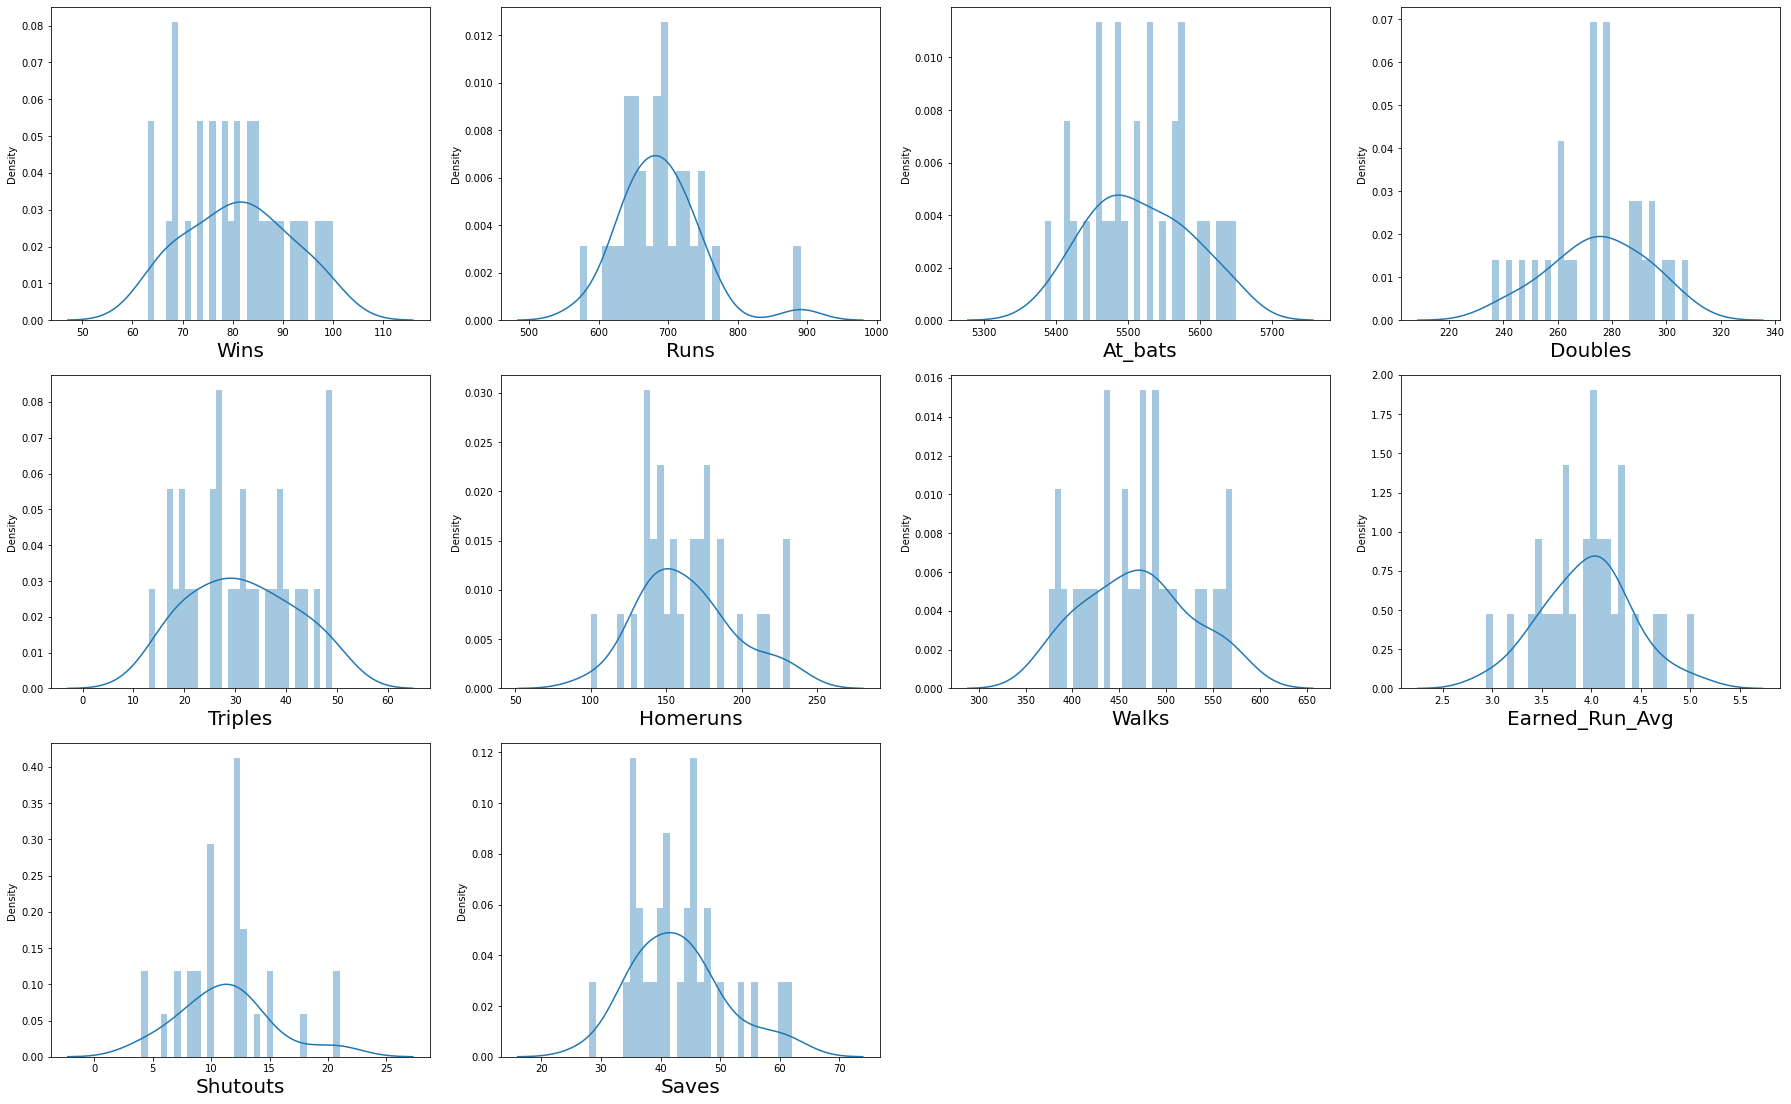

In [26]:
#Lets have a look on distribution of continuous parameters
plt.figure(figsize = (25,20))
plotnumber = 1
for column in df:
    if plotnumber <=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column], bins=30)
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

* Great most of the data looks like normally distributed, little skewness is there in columns like Runs,Homeruns,complete-games and shutouts, lets check the skewness
* Here our dataset is too small and we don't want to loose any data, so we will not remove any outliers.

In [27]:
#lets check the skewness 
df.skew()
#we will treat the skewness 

Wins              0.047089
Runs              1.200786
At_bats           0.183437
Doubles          -0.230650
Triples           0.129502
Homeruns          0.516441
Walks             0.158498
Earned_Run_Avg    0.053331
Shutouts          0.565790
Saves             0.657524
dtype: float64

In [28]:
#lets seperat our data into label and features
x = df.drop(columns = "Wins", axis = 1)
y = df["Wins"]

In [29]:
#Lets treat the skewed data
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [30]:
#check skewness again after treating
x.skew()

Runs              0.744813
At_bats           0.183437
Doubles          -0.230650
Triples           0.129502
Homeruns         -0.009528
Walks             0.158498
Earned_Run_Avg    0.053331
Shutouts         -0.093545
Saves             0.163057
dtype: float64

we have removed some skewness but not completely.

In [31]:
#Bring all the features to same scale using standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
X = pd.DataFrame(X,columns = x.columns)
X

,Runs,At_bats,Doubles,Triples,Homeruns,Walks,Earned_Run_Avg,Shutouts,Saves
0,0.665329,0.847731,1.420173,1.041193,-0.763978,-1.534902,-0.506955,-0.789565,1.581273
1,0.179562,-0.711094,0.127403,1.235809,-0.157077,-0.536592,0.254598,0.267953,0.336185
2,-0.307704,-1.115233,1.588795,-0.223808,-0.688861,1.139144,-0.641347,-0.232712,-0.622441
3,-1.204730,0.241522,-0.828122,-0.418423,-0.878690,-1.160536,0.053010,-0.503258,-0.773282
4,0.055070,1.280738,0.801892,1.722347,-0.328473,-0.251360,1.531318,0.267953,-1.087253
5,3.221983,-0.104884,1.869832,-1.391501,1.933613,1.798742,-0.350165,-0.232712,-1.250843
6,1.327687,0.732263,-0.153633,-1.196885,1.458347,1.513510,0.165003,-2.140778,0.703068
7,0.476767,-0.451289,-1.615025,-1.099578,1.581221,-0.910958,0.209800,-0.232712,0.078051
8,-0.776713,-0.451289,0.183611,0.068115,0.201536,-0.590073,-0.484557,0.267953,1.975123
9,1.066997,1.785913,1.082929,0.165423,0.008945,0.158660,0.792164,-0.232712,-0.332028


## Find Best randomstate

In [32]:
#Lets find best random state using LinearRegression
from sklearn.linear_model import LinearRegression
max_r_score=0
r_state = 0
for i in range(3,100):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state = r_state)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.8863431355771182 on Random State 3


In [33]:
#lets split our train data into train and test part
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.30,random_state = r_state)

In [34]:
#Model with DecesionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)

#evaluation
mse = mean_squared_error(y_test,pred_dt)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_dt)
print("MAE :", mae)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test,pred_dt)
print("R2 Score :", r2)

MAE : 7.666666666666667
RMSE : 9.0
R2 Score : 0.41907207366743415


In [35]:
#Model with LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)

#evaluation
mse = mean_squared_error(y_test,pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_lr)
print("MAE :", mae)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test,pred_lr)
print("R2 Score :", r2)

MAE : 3.8837240632871217
RMSE : 4.408217232981788
R2 Score : 0.8606319538670297


In [36]:
#Model with RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

# evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
print("MAE :", mae)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score :", r2)

MAE : 6.6677777777777765
RMSE : 7.552039459642673
R2 Score : 0.5909600407295911


In [37]:
#Model with KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knr =  KNeighborsRegressor()
knr.fit(x_train, y_train)
pred_knr = knr.predict(x_test)

# evaluation
mse = mean_squared_error(y_test, pred_knr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_knr)
print("MAE :", mae)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test, pred_knr)
print("R2 Score :", r2)

MAE : 6.711111111111109
RMSE : 7.670433857061509
R2 Score : 0.5780343545245268


In [38]:
#Lets use SVM regressor
from sklearn.svm import SVR
svr =  KNeighborsRegressor()
svr.fit(x_train, y_train)
pred_svr = svr.predict(x_test)

# evaluation
mse = mean_squared_error(y_test, pred_svr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_svr)
print("MAE :", mae)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test, pred_svr)
print("R2 Score :", r2)

MAE : 6.711111111111109
RMSE : 7.670433857061509
R2 Score : 0.5780343545245268


## Cross Validation

In [39]:
#Let's check cross validation score for all algorithms
#for LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from statistics import mean
scores = []
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    scores.append(r2_score(y_test, y_pred))  
print("Cross validation score of LinearRegression model is :", mean(scores))

Cross validation score of LinearRegression model is : 0.777051887451231


In [40]:
#for DecisionTreeRegressor
scores = []
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    dt.fit(X_train,y_train)
    pred_dtr = dt.predict(X_test)
    scores.append(r2_score(y_test, pred_dtr))  
print("Cross validation score of DecisionTreeRegressor model is :", mean(scores))

Cross validation score of DecisionTreeRegressor model is : -0.8108158554670631


In [41]:
#for RandomForestRegressor
scores = []
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    rf.fit(X_train,y_train)
    rfr_pred = dt.predict(X_test)
    scores.append(r2_score(y_test, rfr_pred))  
print("Cross validation score of RandomForestRegressor model is :", mean(scores))

Cross validation score of RandomForestRegressor model is : 0.9132450331125828


In [42]:
#for KNeighborsRegressor
scores = []
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    knr.fit(X_train,y_train)
    knr_pred = dt.predict(X_test)
    scores.append(r2_score(y_test, knr_pred))  
print("Cross validation score of KNeighborsRegressor model is :", mean(scores))

Cross validation score of KNeighborsRegressor model is : 0.9132450331125828


In [43]:
#for SVM
scores = []
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    svr.fit(X_train,y_train)
    svr_pred = dt.predict(X_test)
    scores.append(r2_score(y_test, svr_pred))  
print("Cross validation score of SVM model is :", mean(scores))

Cross validation score of SVM model is : 0.9132450331125828


* After cross validation we can say that LinearRegression model is having minimum difference in r2 score and cv score, so we will select it as best suitable model.
* But LinearRegression model is seems to be overfitting. We will go for regularization using Ridge and Lasso Regression.

## Regularization

In [44]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
#Lasso regression
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.30,random_state = r_state)
lassocv = LassoCV(alphas = None, cv = 10,max_iter = 1000)
lassocv.fit(x_train,y_train)

#best alpha parameter
alpha = lassocv.alpha_

#Now we have best parameter, lets use lasso regression
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)
y_pred = lasso_reg.predict(x_test)

print("Lasso regression score for test data :", lasso_reg.score(x_test,y_test))
print("r2 score :", r2_score(y_test,y_pred))
print('--------------------------------------------')


Lasso regression score for test data : 0.9158085105699753
r2 score : 0.9158085105699753
--------------------------------------------


In [45]:
#Lets use Ridge Regression
ridgecv = RidgeCV(cv = 10, normalize = True)
ridgecv.fit(x_train,y_train)

#lets fit model with best parameters
ridge_model = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)
y_pred = ridge_model.predict(x_test)

print("Ridge Regression score for test data :", lasso_reg.score(x_test,y_test))
print("r2 score :", r2_score(y_test,y_pred))
print('--------------------------------------------')


Ridge Regression score for test data : 0.9158085105699753
r2 score : 0.8713137247333633
--------------------------------------------


As Ridge Regression model is giving much nearer results to overall accuracy, we will select this as best suitable model, for hyperparameter

## Hyperparameter Tuning

In [53]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])

In [62]:
GCV =  GridSearchCV(estimator = Ridge(), cv = 5, param_grid=dict(alpha=alphas))
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])})

In [64]:
GCV.best_params_

{'alpha': 1.0}

In [66]:
#Lets check the final model accuracy
model = Ridge(alpha = 1, normalize = True)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

# evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
print("MAE :", mae)
print("RMSE :", rmse)


print("r2 score :", r2_score(y_test,y_pred))
print('--------------------------------------------')


MAE : 4.591900850415708
RMSE : 5.625076291224825
r2 score : 0.7730688732202878
--------------------------------------------


Great our final model is giving accuracy almost close to overall accuracy. 

- __Lets see final Actual Vs Predicted sample.__

,Y Test,Pred
15,100,91.583497
5,93,89.654317
22,71,71.143591
26,84,83.007143
18,68,75.059941


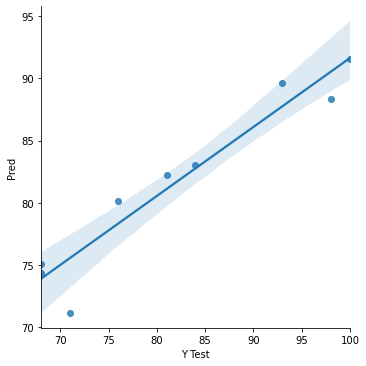

In [67]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

## Saving the model

In [69]:
import joblib
joblib.dump(model,"BaseBall_prediction.pkl")

['BaseBall_prediction.pkl']